Анализ данных не примере первого варианта финального проекта курса "Аналитик данных" karpov.courses

[0. Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).](#0)

[1. Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667. Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?](#1)

[2. В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?](#2)

<a id="1"></a>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2, style="whitegrid", rc={'figure.figsize' : (15,7)})
import matplotlib.pyplot as plt
from scipy import special
plt.style.use('dark_background')

<a id="0"></a> Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока)

In [36]:
url='https://drive.google.com/file/d/18Fa0cDVGq7bf8O7KEb23CFgU0w5qsMaD/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_r = pd.read_csv(url, sep=";")
df_r.head(1)

,reg_ts,uid
0,911382223,1


In [37]:
url='https://drive.usercontent.google.com/download?id=12xLu8LW-RvixxIPkourv73x4IUbqpYow&export=download&authuser=0&confirm=t&uuid=d43e5d1c-cec3-4518-84ae-d49b30d9c527&at=AENtkXYRTcBqWPAkd3eLSmLq1DSN%3A1733307676786'
df_a = pd.read_csv(url, sep=";")
df_a.head(1)

,auth_ts,uid
0,911382223,1


Подготовка и знакомство с данными

In [39]:
#Таймстэмпы оказались импортированы как целые числа, переведем их даты и переименуем колонки в привычные, простые и запоминающиеся

df_r.reg_ts = pd.to_datetime(df_r.reg_ts, unit='s')
df_r = df_r.rename(columns = {'reg_ts' : 'r_date',
                     'uid' : 'id'})
df_a.auth_ts = pd.to_datetime(df_a.auth_ts, unit='s')
df_a = df_a.rename(columns = {'auth_ts' : 'a_date',
                     'uid' : 'id'})

<Axes: >

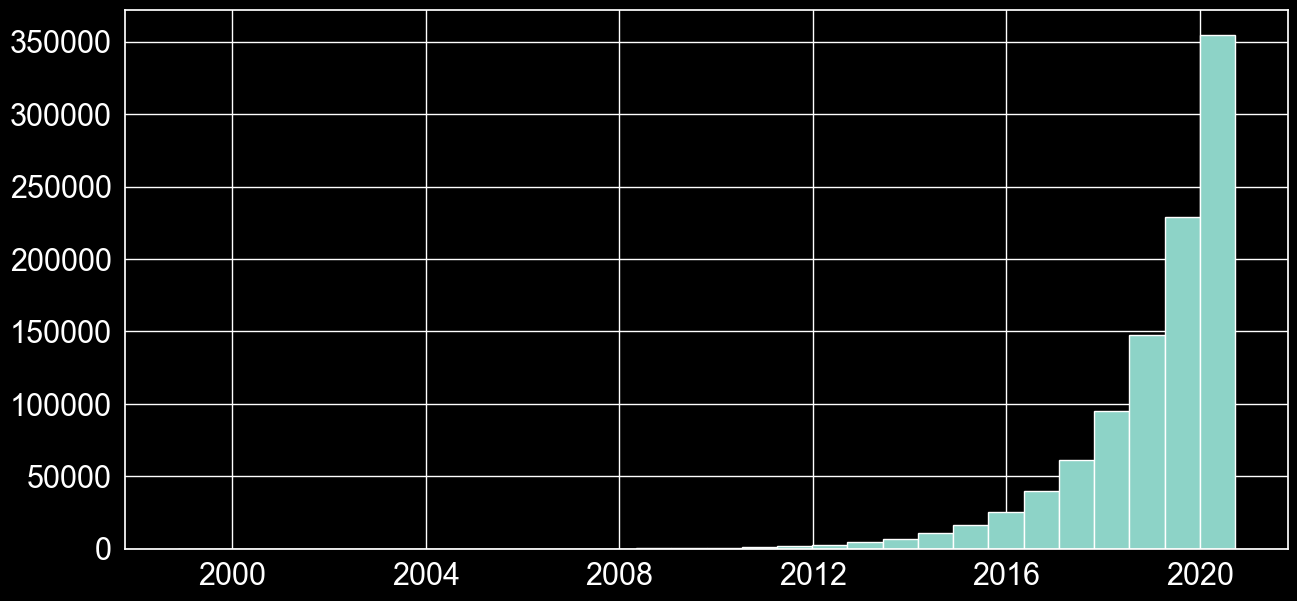

In [47]:
df_r.r_date.hist(bins=30)

<Axes: >

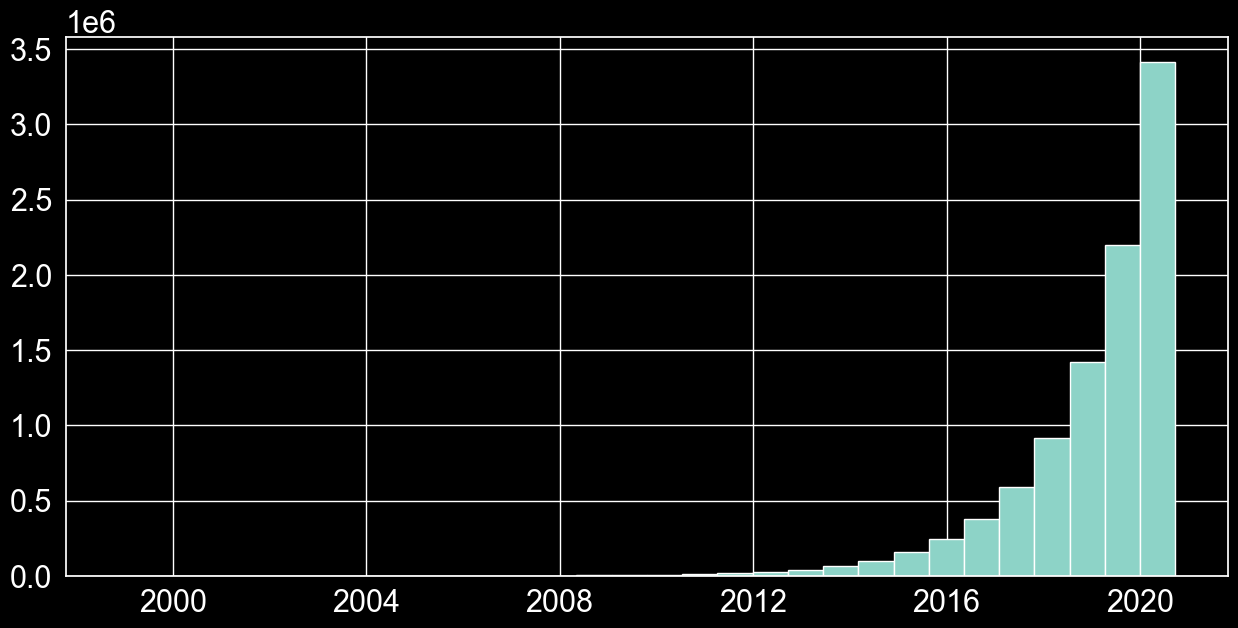

In [43]:
df_a.a_date.hist(bins=30)

In [ ]:
# Посмотрим на временные интервалы в данных
pd.DataFrame({'':['start date', 'end_date'],' ': [df_r['r_date'].min(),df_r['r_date'].max()]})

,,
0,start date,1998-11-18 09:43:43
1,end_date,2020-09-23 15:17:24


In [46]:
pd.DataFrame({'':['start date', 'end_date'],' ': [df_a['a_date'].min(),df_a['a_date'].max()]})

,,
0,start date,1998-11-18 09:43:43
1,end_date,2020-09-23 15:17:24


In [49]:
# Соберем два набора данных в один по айди пользователя - допишем каждому id дату и время его регистрации
df = pd.merge(df_a, df_r, how = 'left', on='id')
df

,a_date,id,r_date
0,1998-11-18 09:43:43,1,1998-11-18 09:43:43
1,1999-07-22 22:38:09,2,1999-07-22 22:38:09
2,1999-07-25 16:46:46,2,1999-07-22 22:38:09
3,1999-07-31 03:50:15,2,1999-07-22 22:38:09
4,1999-08-05 17:49:39,2,1999-07-22 22:38:09
...,...,...,...
9601008,2020-09-23 15:13:54,1110618,2020-09-23 15:13:54
9601009,2020-09-23 15:14:46,1110619,2020-09-23 15:14:46
9601010,2020-09-23 15:15:39,1110620,2020-09-23 15:15:39
9601011,2020-09-23 15:16:31,1110621,2020-09-23 15:16:31


In [ ]:
df_tmp=df.groupby('id').a_date.count().sort_values(ascending = False)
print(f'\
1. Регистраций всего: {len(df_r)} \n\
2. Уникальных пользователей: {df_r.id.nunique()} {100*df_r.id.nunique()/len(df_r)}% \n\
3. Зарегистрировались, но в игру так и не зашли: {} В игру не зашли ни разубольше одного раза в игру зашли {df_tmp[df_tmp.values >1].count()}\3.
')


1. Регистраций всего: 1000000 
2. Уникальных пользователей: 1000000 100.0, 
из них больше одного раза в игру зашли 238378
